In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: WY
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


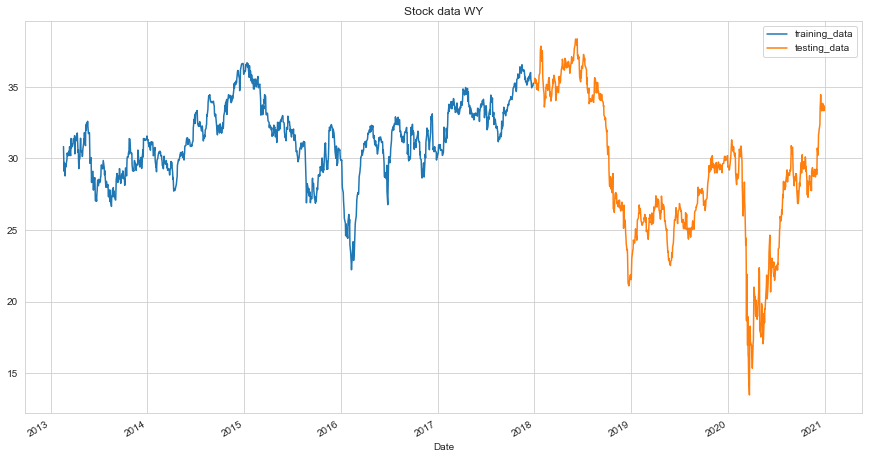

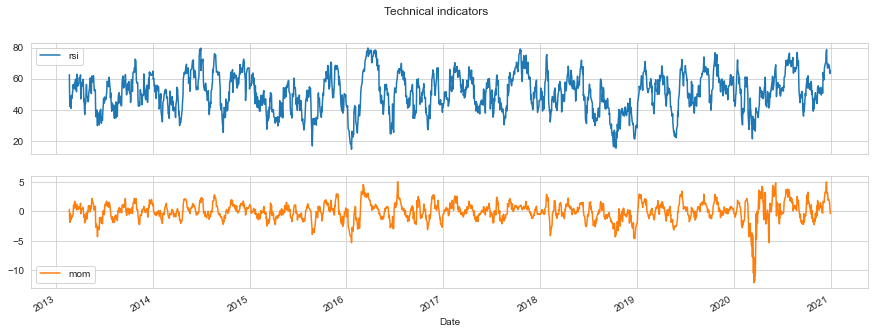

In [2]:
stock_name = 'wy'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1178.38, duration: 0:00:00.401532
episode: 2/2000, episode end value: 1188.52, duration: 0:00:00.464582
episode: 3/2000, episode end value: 1150.80, duration: 0:00:00.339918
episode: 4/2000, episode end value: 1128.46, duration: 0:00:00.405269
episode: 5/2000, episode end value: 1142.51, duration: 0:00:00.383783
episode: 6/2000, episode end value: 1170.26, duration: 0:00:00.362249
episode: 7/2000, episode end value: 1205.31, duration: 0:00:00.404497
episode: 8/2000, episode end value: 1160.68, duration: 0:00:00.386639
episode: 9/2000, episode end value: 1146.43, duration: 0:00:00.359645
episode: 10/2000, episode end value: 1146.50, duration: 0:00:00.446196
episode: 11/2000, episode end value: 1169.25, duration: 0:00:00.378224
episode: 12/2000, episode end value: 1138.16, duration: 0:00:00.357566
episode: 13/2000, episode end value: 1159.95, duration: 0:00:00.451685
episode: 14/2000, episode end value: 1163.31, duration: 0:00:00.382861
episode: 15/200

episode: 117/2000, episode end value: 1146.89, duration: 0:00:00.347001
episode: 118/2000, episode end value: 1155.08, duration: 0:00:00.354152
episode: 119/2000, episode end value: 1146.95, duration: 0:00:00.431210
episode: 120/2000, episode end value: 1143.12, duration: 0:00:00.352246
episode: 121/2000, episode end value: 1153.40, duration: 0:00:00.387807
episode: 122/2000, episode end value: 1139.45, duration: 0:00:00.444319
episode: 123/2000, episode end value: 1156.32, duration: 0:00:00.396102
episode: 124/2000, episode end value: 1157.65, duration: 0:00:00.429010
episode: 125/2000, episode end value: 1149.05, duration: 0:00:00.424258
episode: 126/2000, episode end value: 1163.78, duration: 0:00:00.375933
episode: 127/2000, episode end value: 1143.02, duration: 0:00:00.360031
episode: 128/2000, episode end value: 1149.77, duration: 0:00:00.405140
episode: 129/2000, episode end value: 1144.27, duration: 0:00:00.359741
episode: 130/2000, episode end value: 1145.35, duration: 0:00:00

episode: 231/2000, episode end value: 1174.24, duration: 0:00:00.395956
episode: 232/2000, episode end value: 1138.02, duration: 0:00:00.401206
episode: 233/2000, episode end value: 1159.04, duration: 0:00:00.393808
episode: 234/2000, episode end value: 1149.38, duration: 0:00:00.424346
episode: 235/2000, episode end value: 1147.78, duration: 0:00:00.379430
episode: 236/2000, episode end value: 1141.88, duration: 0:00:00.382772
episode: 237/2000, episode end value: 1148.87, duration: 0:00:00.379560
episode: 238/2000, episode end value: 1158.67, duration: 0:00:00.366420
episode: 239/2000, episode end value: 1141.37, duration: 0:00:00.428274
episode: 240/2000, episode end value: 1136.90, duration: 0:00:00.388875
episode: 241/2000, episode end value: 1141.57, duration: 0:00:00.353002
episode: 242/2000, episode end value: 1150.76, duration: 0:00:00.462938
episode: 243/2000, episode end value: 1138.57, duration: 0:00:00.406910
episode: 244/2000, episode end value: 1156.11, duration: 0:00:00

episode: 345/2000, episode end value: 1170.30, duration: 0:00:00.412692
episode: 346/2000, episode end value: 1147.78, duration: 0:00:00.367045
episode: 347/2000, episode end value: 1146.91, duration: 0:00:00.380983
episode: 348/2000, episode end value: 1159.88, duration: 0:00:00.430736
episode: 349/2000, episode end value: 1154.24, duration: 0:00:00.361342
episode: 350/2000, episode end value: 1137.34, duration: 0:00:00.429665
episode: 351/2000, episode end value: 1137.81, duration: 0:00:00.374943
episode: 352/2000, episode end value: 1139.48, duration: 0:00:00.345537
episode: 353/2000, episode end value: 1169.69, duration: 0:00:00.379425
episode: 354/2000, episode end value: 1144.58, duration: 0:00:00.337488
episode: 355/2000, episode end value: 1140.04, duration: 0:00:00.386020
episode: 356/2000, episode end value: 1141.77, duration: 0:00:00.375559
episode: 357/2000, episode end value: 1149.63, duration: 0:00:00.417129
episode: 358/2000, episode end value: 1147.98, duration: 0:00:00

episode: 459/2000, episode end value: 1141.52, duration: 0:00:00.409334
episode: 460/2000, episode end value: 1135.73, duration: 0:00:00.442266
episode: 461/2000, episode end value: 1161.01, duration: 0:00:00.345880
episode: 462/2000, episode end value: 1139.25, duration: 0:00:00.342462
episode: 463/2000, episode end value: 1179.54, duration: 0:00:00.391592
episode: 464/2000, episode end value: 1143.45, duration: 0:00:00.404134
episode: 465/2000, episode end value: 1167.33, duration: 0:00:00.419719
episode: 466/2000, episode end value: 1147.30, duration: 0:00:00.347408
episode: 467/2000, episode end value: 1156.32, duration: 0:00:00.339140
episode: 468/2000, episode end value: 1142.10, duration: 0:00:00.391958
episode: 469/2000, episode end value: 1138.60, duration: 0:00:00.378615
episode: 470/2000, episode end value: 1148.37, duration: 0:00:00.458528
episode: 471/2000, episode end value: 1163.26, duration: 0:00:00.428309
episode: 472/2000, episode end value: 1146.15, duration: 0:00:00

episode: 573/2000, episode end value: 1148.81, duration: 0:00:00.352111
episode: 574/2000, episode end value: 1146.95, duration: 0:00:00.389453
episode: 575/2000, episode end value: 1164.57, duration: 0:00:00.492991
episode: 576/2000, episode end value: 1140.04, duration: 0:00:00.440143
episode: 577/2000, episode end value: 1136.70, duration: 0:00:00.392713
episode: 578/2000, episode end value: 1141.45, duration: 0:00:00.373198
episode: 579/2000, episode end value: 1146.01, duration: 0:00:00.387199
episode: 580/2000, episode end value: 1148.70, duration: 0:00:00.361026
episode: 581/2000, episode end value: 1138.03, duration: 0:00:00.399815
episode: 582/2000, episode end value: 1186.33, duration: 0:00:00.425551
episode: 583/2000, episode end value: 1155.82, duration: 0:00:00.355267
episode: 584/2000, episode end value: 1165.21, duration: 0:00:00.386301
episode: 585/2000, episode end value: 1147.88, duration: 0:00:00.403281
episode: 586/2000, episode end value: 1152.74, duration: 0:00:00

episode: 687/2000, episode end value: 1153.28, duration: 0:00:00.358519
episode: 688/2000, episode end value: 1161.56, duration: 0:00:00.394342
episode: 689/2000, episode end value: 1149.60, duration: 0:00:00.339400
episode: 690/2000, episode end value: 1147.71, duration: 0:00:00.450192
episode: 691/2000, episode end value: 1147.29, duration: 0:00:00.368030
episode: 692/2000, episode end value: 1137.05, duration: 0:00:00.330023
episode: 693/2000, episode end value: 1160.04, duration: 0:00:00.367753
episode: 694/2000, episode end value: 1152.36, duration: 0:00:00.430287
episode: 695/2000, episode end value: 1151.50, duration: 0:00:00.319812
episode: 696/2000, episode end value: 1155.37, duration: 0:00:00.388361
episode: 697/2000, episode end value: 1166.26, duration: 0:00:00.430960
episode: 698/2000, episode end value: 1183.96, duration: 0:00:00.399636
episode: 699/2000, episode end value: 1125.60, duration: 0:00:00.345708
episode: 700/2000, episode end value: 1177.64, duration: 0:00:00

episode: 801/2000, episode end value: 1163.99, duration: 0:00:00.384642
episode: 802/2000, episode end value: 1146.92, duration: 0:00:00.352146
episode: 803/2000, episode end value: 1166.55, duration: 0:00:00.460770
episode: 804/2000, episode end value: 1154.30, duration: 0:00:00.385665
episode: 805/2000, episode end value: 1149.56, duration: 0:00:00.358595
episode: 806/2000, episode end value: 1152.09, duration: 0:00:00.322208
episode: 807/2000, episode end value: 1145.65, duration: 0:00:00.439664
episode: 808/2000, episode end value: 1149.93, duration: 0:00:00.426103
episode: 809/2000, episode end value: 1137.38, duration: 0:00:00.395786
episode: 810/2000, episode end value: 1147.33, duration: 0:00:00.418036
episode: 811/2000, episode end value: 1159.87, duration: 0:00:00.383929
episode: 812/2000, episode end value: 1159.11, duration: 0:00:00.444816
episode: 813/2000, episode end value: 1153.38, duration: 0:00:00.357316
episode: 814/2000, episode end value: 1148.87, duration: 0:00:00

episode: 915/2000, episode end value: 1141.99, duration: 0:00:00.428667
episode: 916/2000, episode end value: 1154.71, duration: 0:00:00.407786
episode: 917/2000, episode end value: 1146.94, duration: 0:00:00.344244
episode: 918/2000, episode end value: 1139.87, duration: 0:00:00.381375
episode: 919/2000, episode end value: 1161.09, duration: 0:00:00.399648
episode: 920/2000, episode end value: 1141.46, duration: 0:00:00.412913
episode: 921/2000, episode end value: 1146.20, duration: 0:00:00.377072
episode: 922/2000, episode end value: 1149.33, duration: 0:00:00.393776
episode: 923/2000, episode end value: 1184.17, duration: 0:00:00.388757
episode: 924/2000, episode end value: 1172.60, duration: 0:00:00.355111
episode: 925/2000, episode end value: 1178.97, duration: 0:00:00.464218
episode: 926/2000, episode end value: 1162.95, duration: 0:00:00.326547
episode: 927/2000, episode end value: 1140.47, duration: 0:00:00.404572
episode: 928/2000, episode end value: 1164.65, duration: 0:00:00

episode: 1029/2000, episode end value: 1141.58, duration: 0:00:00.447107
episode: 1030/2000, episode end value: 1168.19, duration: 0:00:00.373214
episode: 1031/2000, episode end value: 1147.07, duration: 0:00:00.389143
episode: 1032/2000, episode end value: 1170.05, duration: 0:00:00.333556
episode: 1033/2000, episode end value: 1152.15, duration: 0:00:00.340027
episode: 1034/2000, episode end value: 1161.37, duration: 0:00:00.426342
episode: 1035/2000, episode end value: 1162.29, duration: 0:00:00.427799
episode: 1036/2000, episode end value: 1153.98, duration: 0:00:00.450123
episode: 1037/2000, episode end value: 1157.22, duration: 0:00:00.436785
episode: 1038/2000, episode end value: 1170.95, duration: 0:00:00.375197
episode: 1039/2000, episode end value: 1155.49, duration: 0:00:00.388779
episode: 1040/2000, episode end value: 1159.23, duration: 0:00:00.342006
episode: 1041/2000, episode end value: 1140.24, duration: 0:00:00.363648
episode: 1042/2000, episode end value: 1155.69, dur

episode: 1142/2000, episode end value: 1152.45, duration: 0:00:00.328453
episode: 1143/2000, episode end value: 1135.39, duration: 0:00:00.427966
episode: 1144/2000, episode end value: 1140.88, duration: 0:00:00.377772
episode: 1145/2000, episode end value: 1137.22, duration: 0:00:00.397400
episode: 1146/2000, episode end value: 1157.17, duration: 0:00:00.453283
episode: 1147/2000, episode end value: 1157.52, duration: 0:00:00.333803
episode: 1148/2000, episode end value: 1151.25, duration: 0:00:00.449813
episode: 1149/2000, episode end value: 1154.58, duration: 0:00:00.401273
episode: 1150/2000, episode end value: 1164.06, duration: 0:00:00.372668
episode: 1151/2000, episode end value: 1170.68, duration: 0:00:00.425141
episode: 1152/2000, episode end value: 1162.79, duration: 0:00:00.378125
episode: 1153/2000, episode end value: 1159.12, duration: 0:00:00.387707
episode: 1154/2000, episode end value: 1173.17, duration: 0:00:00.414389
episode: 1155/2000, episode end value: 1138.31, dur

episode: 1255/2000, episode end value: 1139.66, duration: 0:00:00.371722
episode: 1256/2000, episode end value: 1165.42, duration: 0:00:00.355656
episode: 1257/2000, episode end value: 1130.52, duration: 0:00:00.328252
episode: 1258/2000, episode end value: 1133.77, duration: 0:00:00.354160
episode: 1259/2000, episode end value: 1182.71, duration: 0:00:00.399513
episode: 1260/2000, episode end value: 1153.12, duration: 0:00:00.425101
episode: 1261/2000, episode end value: 1168.46, duration: 0:00:00.361518
episode: 1262/2000, episode end value: 1146.24, duration: 0:00:00.408850
episode: 1263/2000, episode end value: 1139.06, duration: 0:00:00.355860
episode: 1264/2000, episode end value: 1131.10, duration: 0:00:00.424856
episode: 1265/2000, episode end value: 1149.08, duration: 0:00:00.391543
episode: 1266/2000, episode end value: 1160.01, duration: 0:00:00.417664
episode: 1267/2000, episode end value: 1153.13, duration: 0:00:00.369832
episode: 1268/2000, episode end value: 1162.25, dur

episode: 1368/2000, episode end value: 1163.07, duration: 0:00:00.492230
episode: 1369/2000, episode end value: 1139.67, duration: 0:00:00.412171
episode: 1370/2000, episode end value: 1137.79, duration: 0:00:00.404196
episode: 1371/2000, episode end value: 1156.75, duration: 0:00:00.389033
episode: 1372/2000, episode end value: 1176.40, duration: 0:00:00.352545
episode: 1373/2000, episode end value: 1162.07, duration: 0:00:00.371497
episode: 1374/2000, episode end value: 1156.99, duration: 0:00:00.383456
episode: 1375/2000, episode end value: 1160.91, duration: 0:00:00.409334
episode: 1376/2000, episode end value: 1152.12, duration: 0:00:00.415450
episode: 1377/2000, episode end value: 1169.59, duration: 0:00:00.414473
episode: 1378/2000, episode end value: 1172.50, duration: 0:00:00.342042
episode: 1379/2000, episode end value: 1165.43, duration: 0:00:00.349090
episode: 1380/2000, episode end value: 1136.75, duration: 0:00:00.439775
episode: 1381/2000, episode end value: 1154.72, dur

episode: 1481/2000, episode end value: 1180.32, duration: 0:00:00.407585
episode: 1482/2000, episode end value: 1134.64, duration: 0:00:00.372608
episode: 1483/2000, episode end value: 1155.33, duration: 0:00:00.389508
episode: 1484/2000, episode end value: 1159.62, duration: 0:00:00.361949
episode: 1485/2000, episode end value: 1168.14, duration: 0:00:00.315981
episode: 1486/2000, episode end value: 1160.14, duration: 0:00:00.334597
episode: 1487/2000, episode end value: 1154.42, duration: 0:00:00.308772
episode: 1488/2000, episode end value: 1162.69, duration: 0:00:00.317522
episode: 1489/2000, episode end value: 1138.37, duration: 0:00:00.330246
episode: 1490/2000, episode end value: 1180.02, duration: 0:00:00.338623
episode: 1491/2000, episode end value: 1145.28, duration: 0:00:00.323141
episode: 1492/2000, episode end value: 1171.59, duration: 0:00:00.339938
episode: 1493/2000, episode end value: 1155.57, duration: 0:00:00.296071
episode: 1494/2000, episode end value: 1176.16, dur

episode: 1594/2000, episode end value: 1154.21, duration: 0:00:00.288857
episode: 1595/2000, episode end value: 1138.58, duration: 0:00:00.284035
episode: 1596/2000, episode end value: 1162.99, duration: 0:00:00.285720
episode: 1597/2000, episode end value: 1149.27, duration: 0:00:00.290093
episode: 1598/2000, episode end value: 1129.97, duration: 0:00:00.296590
episode: 1599/2000, episode end value: 1167.53, duration: 0:00:00.300408
episode: 1600/2000, episode end value: 1123.00, duration: 0:00:00.281358
episode: 1601/2000, episode end value: 1145.27, duration: 0:00:00.308803
episode: 1602/2000, episode end value: 1155.60, duration: 0:00:00.297811
episode: 1603/2000, episode end value: 1142.48, duration: 0:00:00.326057
episode: 1604/2000, episode end value: 1143.43, duration: 0:00:00.293503
episode: 1605/2000, episode end value: 1145.30, duration: 0:00:00.270817
episode: 1606/2000, episode end value: 1138.36, duration: 0:00:00.297736
episode: 1607/2000, episode end value: 1163.37, dur

episode: 1707/2000, episode end value: 1142.96, duration: 0:00:00.241659
episode: 1708/2000, episode end value: 1144.99, duration: 0:00:00.234447
episode: 1709/2000, episode end value: 1150.02, duration: 0:00:00.248720
episode: 1710/2000, episode end value: 1142.98, duration: 0:00:00.241627
episode: 1711/2000, episode end value: 1161.87, duration: 0:00:00.261023
episode: 1712/2000, episode end value: 1161.89, duration: 0:00:00.271094
episode: 1713/2000, episode end value: 1139.99, duration: 0:00:00.258451
episode: 1714/2000, episode end value: 1168.00, duration: 0:00:00.258890
episode: 1715/2000, episode end value: 1156.06, duration: 0:00:00.246654
episode: 1716/2000, episode end value: 1158.38, duration: 0:00:00.249124
episode: 1717/2000, episode end value: 1149.36, duration: 0:00:00.248310
episode: 1718/2000, episode end value: 1176.95, duration: 0:00:00.293413
episode: 1719/2000, episode end value: 1172.94, duration: 0:00:00.247475
episode: 1720/2000, episode end value: 1149.85, dur

episode: 1820/2000, episode end value: 1156.39, duration: 0:00:00.235244
episode: 1821/2000, episode end value: 1148.30, duration: 0:00:00.270607
episode: 1822/2000, episode end value: 1136.12, duration: 0:00:00.231932
episode: 1823/2000, episode end value: 1145.77, duration: 0:00:00.234477
episode: 1824/2000, episode end value: 1153.80, duration: 0:00:00.262930
episode: 1825/2000, episode end value: 1159.14, duration: 0:00:00.224145
episode: 1826/2000, episode end value: 1140.37, duration: 0:00:00.255668
episode: 1827/2000, episode end value: 1192.94, duration: 0:00:00.249184
episode: 1828/2000, episode end value: 1138.57, duration: 0:00:00.231718
episode: 1829/2000, episode end value: 1142.52, duration: 0:00:00.229246
episode: 1830/2000, episode end value: 1144.21, duration: 0:00:00.215236
episode: 1831/2000, episode end value: 1142.40, duration: 0:00:00.235018
episode: 1832/2000, episode end value: 1175.60, duration: 0:00:00.228199
episode: 1833/2000, episode end value: 1153.82, dur

episode: 1933/2000, episode end value: 1149.27, duration: 0:00:00.206095
episode: 1934/2000, episode end value: 1137.14, duration: 0:00:00.207033
episode: 1935/2000, episode end value: 1134.60, duration: 0:00:00.224961
episode: 1936/2000, episode end value: 1180.65, duration: 0:00:00.203833
episode: 1937/2000, episode end value: 1153.11, duration: 0:00:00.203823
episode: 1938/2000, episode end value: 1165.67, duration: 0:00:00.200805
episode: 1939/2000, episode end value: 1168.46, duration: 0:00:00.205191
episode: 1940/2000, episode end value: 1150.85, duration: 0:00:00.233521
episode: 1941/2000, episode end value: 1168.51, duration: 0:00:00.213072
episode: 1942/2000, episode end value: 1141.87, duration: 0:00:00.223019
episode: 1943/2000, episode end value: 1152.57, duration: 0:00:00.208704
episode: 1944/2000, episode end value: 1156.31, duration: 0:00:00.214793
episode: 1945/2000, episode end value: 1161.99, duration: 0:00:00.200131
episode: 1946/2000, episode end value: 1161.00, dur

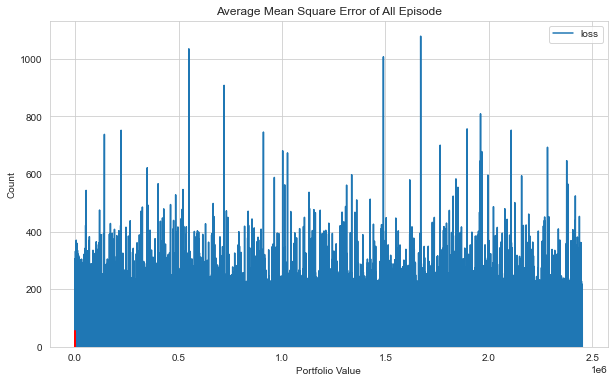

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

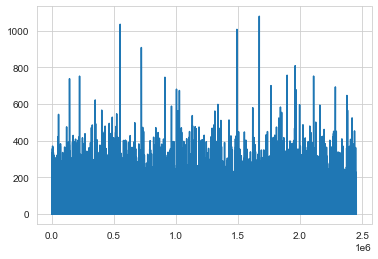

In [5]:
plt.plot(agent.model.losses)

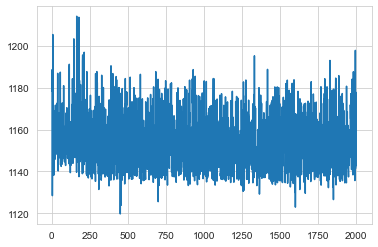

In [6]:
plt.plot(portfolio_value)

episode end value: 1236.36, duration: 0:00:00.089164
Sell: 297 times, Buy: 259 times


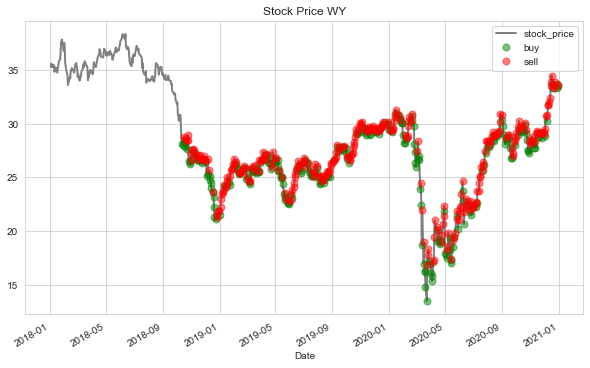

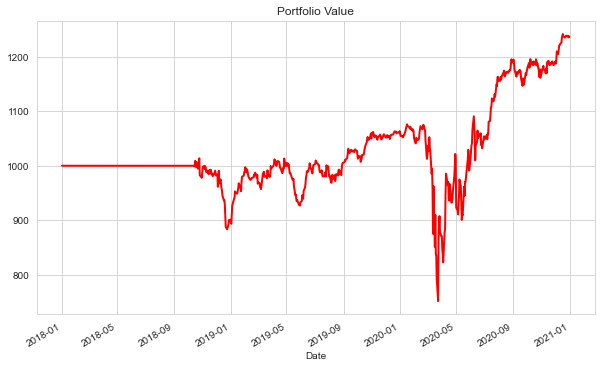

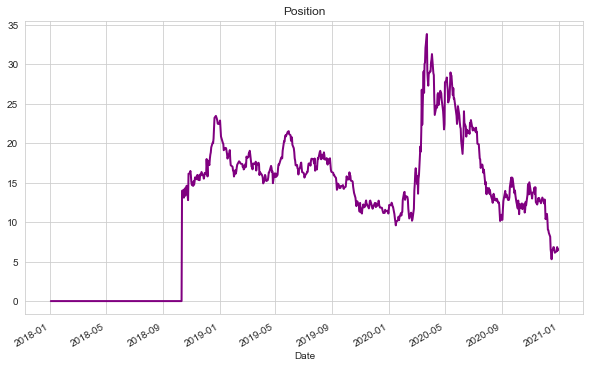

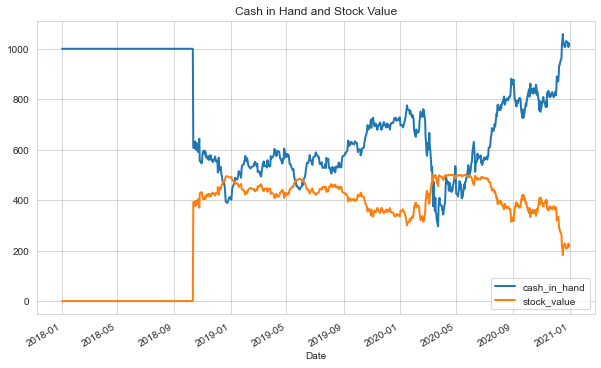

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: WY
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.33 %
Volatility: 0.2185
shape ratio: 0.2851
Maximun drawdown: -30.09 %
Calmar ratio: 0.2436
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -1.70 %
Volatility (benchmark): 0.4439
shape ratio: -0.0631
Maximun drawdown: -64.89 %
Calmar ratio (benchmark): -0.0262


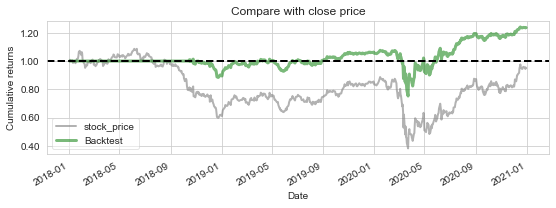

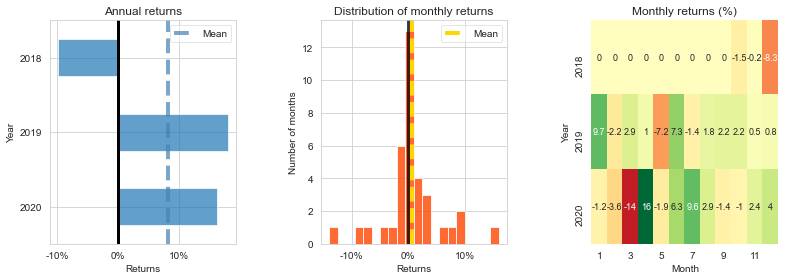

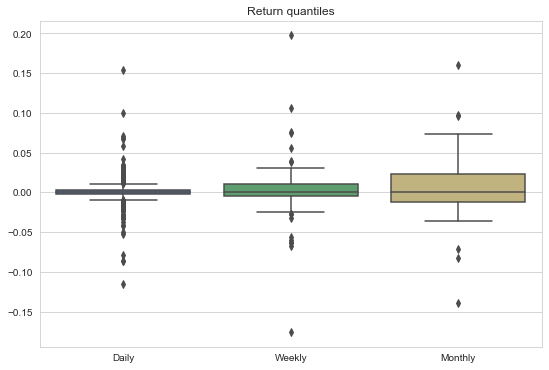

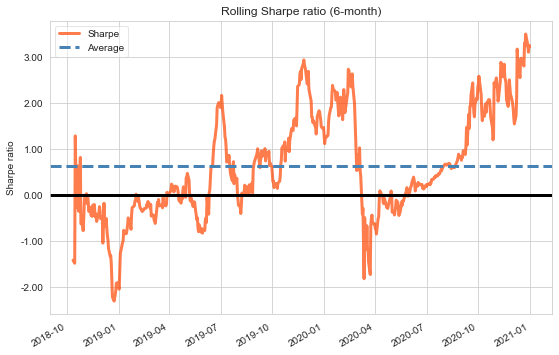

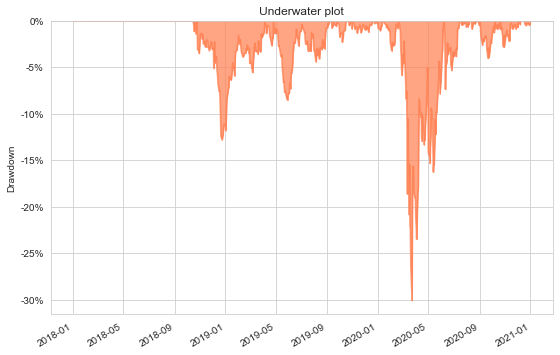

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')